In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('cleaned_Data.csv')

In [3]:
data.head()

,date,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
1,2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2,2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
3,2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
4,2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0


***Column required to be predicted are temp,dew_pt,hum,wind_spd,vis,pressure. But for now we will try to predict for one of the column***

In [4]:
data.drop(['rain'],axis=1,inplace=True)

In [5]:
data.set_index('date',inplace=True)
data.index = pd.DatetimeIndex(data.index)

In [6]:
data.head()

,temp,dew_pt,hum,wind_spd,vis,pressure
date,,,,,,
2018-01-01 02:30:00,69,64,80,2.3,1,29.87
2018-01-01 05:30:00,68,65,87,4.6,1,29.84
2018-01-01 08:30:00,71,64,71,6.9,1,29.92
2018-01-01 11:30:00,79,69,64,4.6,2,29.89
2018-01-01 14:30:00,79,64,51,6.9,2,29.82


***Aggregating each column day-wise*** 

In [7]:
aggregate_data = data.pivot_table(index=data.index.date)
aggregate_data.head()

,dew_pt,hum,pressure,temp,vis,wind_spd
2018-01-01,65.250000,69.250000,29.861250,73.375000,1.625000,5.175000
2018-01-02,62.500000,68.125000,29.867500,71.625000,1.625000,4.187500
2018-01-03,60.750000,68.250000,29.903750,69.750000,1.625000,3.600000
2018-01-04,65.200000,69.400000,29.936000,73.400000,2.000000,3.460000
2018-01-05,62.428571,73.285714,29.912857,69.714286,1.714286,2.957143


In [8]:
cc='temp'

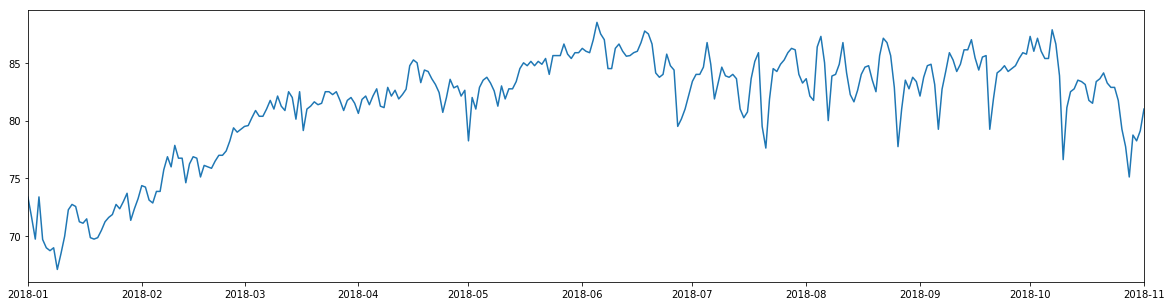

In [9]:
column_list = aggregate_data[cc].astype(float).tolist()
aggregate_data[cc].plot(figsize=[20,5])

***Dividing the data for train and test i.e .70,.30***

In [10]:
len_training = int(len(column_list)*.7)
len_training

212

In [11]:
train,test = column_list[:len_training], column_list[len_training:]

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [13]:
predicted_list, error_list = [], []
training_data = train

***Calculating the error for the test data and saving it into the resid_test list object***

In [14]:
for t in range(len(test)):
    model = ARIMA(training_data, order=(7,0,0))
    model_fit = model.fit(disp=0)
    predicted_value = model_fit.forecast()
    predicted_value = predicted_value[0]
    error_list.append(test[t] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test[t]
    training_data.append(obs)
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))

predicted=84.238776, expected=82.125000 error=2.113776
predicted=82.643312, expected=81.750000 error=0.893312
predicted=82.338130, expected=86.375000 error=4.036870
predicted=85.951964, expected=87.285714 error=1.333750
predicted=86.044725, expected=85.000000 error=1.044725
predicted=84.132736, expected=80.000000 error=4.132736
predicted=80.714099, expected=83.857143 error=3.143044
predicted=84.295188, expected=84.000000 error=0.295188
predicted=84.469968, expected=84.875000 error=0.405032
predicted=84.078147, expected=86.750000 error=2.671853
predicted=86.634816, expected=84.125000 error=2.509816
predicted=82.922367, expected=82.250000 error=0.672367
predicted=82.798271, expected=81.625000 error=1.173271
predicted=82.693508, expected=82.625000 error=0.068508
predicted=83.126375, expected=84.000000 error=0.873625
predicted=84.331885, expected=84.625000 error=0.293115
predicted=84.060777, expected=84.750000 error=0.689223
predicted=83.978804, expected=83.500000 error=0.478804
predicted=

In [15]:
print(error_list)

[array([-2.11377592]), array([-0.89331212]), array([4.0368697]), array([1.33375005]), array([-1.0447248]), array([-4.1327361]), array([3.14304416]), array([-0.29518762]), array([0.40503212]), array([2.67185273]), array([-2.50981603]), array([-0.67236672]), array([-1.17327093]), array([-0.06850786]), array([0.87362455]), array([0.29311454]), array([0.68922318]), array([-0.47880372]), array([-0.5713143]), array([2.97282855]), array([1.60362942]), array([0.4587913]), array([-0.01965733]), array([-2.26900268]), array([-5.25510999]), array([1.37850825]), array([0.36434293]), array([-1.56952379]), array([1.49993557]), array([0.01511704]), array([0.20654035]), array([1.85195394]), array([0.7022266]), array([0.70287174]), array([-1.20974278]), array([-3.76094951]), array([2.89434054]), array([0.60403491]), array([1.55478403]), array([0.37945111]), array([-0.05273212]), array([1.98799792]), array([1.28659157]), array([0.26823004]), array([1.17004055]), array([-0.95418708]), array([-0.62479723])

In [16]:
# test_resid = []
# for i in resid_test:
#     test_resid.append(i[0])

error = mean_squared_error(test, predicted_list)
print('Test MSE: %.3f' % error)

Test MSE: 3.756


***Calculating the error for train data and saving it into the object residuals dataframe***

In [17]:
model = ARIMA(train, order=(7,0,0))
model_fit = model.fit(disp=0)
training_error = model_fit.resid

In [18]:
training_error

array([-6.06706299e+00, -2.05118435e+00, -2.33073169e+00,  2.81713510e+00,
       -4.23161929e+00, -1.32469046e+00, -1.15690848e+00, -9.61392977e-01,
       -2.25161271e+00, -8.77470451e-03,  1.03676708e+00,  2.21898862e+00,
        1.28831562e+00,  7.30728336e-01, -2.42744848e-01,  3.23751680e-02,
        8.19277761e-02, -2.19586614e+00, -7.79058283e-01, -6.72570566e-01,
        2.58781588e-02,  4.86152121e-01,  2.61209898e-01,  5.91442332e-01,
        1.17689327e+00, -6.64705895e-03,  8.57808852e-01,  8.76976085e-01,
       -2.12901933e+00,  8.61206605e-01,  4.24720102e-01,  9.67335983e-01,
        2.31721316e-01, -9.27207864e-01,  6.05124990e-02,  7.02810247e-01,
       -2.29816919e-01,  1.74012666e+00,  1.44999281e+00, -5.90653983e-02,
        2.63290395e+00, -5.30338432e-01,  4.62604304e-01, -2.01027726e+00,
        9.30629052e-01,  3.79730928e-01, -4.50343209e-01, -1.32847301e+00,
        6.84497291e-01, -1.12567674e-01, -3.89737907e-01,  4.96499413e-01,
        3.79187477e-01,  

***Ploting the predicted data and test data to know how the data is covered by the arima***

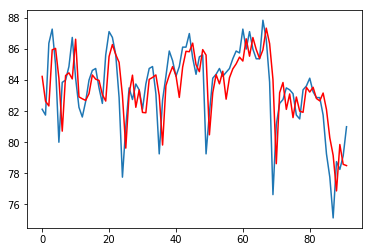

In [19]:
plt.plot(test)
plt.plot(predicted_list, color='red')
plt.show()

***Building ann model to predict error by seeing the previous 7 day error in prediction***

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Dense(100, input_dim=7, init="uniform",
activation="tanh"))
model.add(Dense(50, init="uniform", activation="tanh"))
model.add(Dense(25, init="uniform", activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')


# train_scaled = np.array(training_error).reshape(-1,1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=7, activation="tanh", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="tanh", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="tanh", kernel_initializer="uniform")`
  """


In [22]:
# train_scaled

In [23]:
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

In [24]:
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

In [25]:
model.fit(new_train_X,new_train_Y, nb_epoch=400, batch_size=20,verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/400
297/297 [==============================] - 3s 10ms/step - loss: 2.1352
Epoch 2/400
297/297 [==============================] - 0s 593us/step - loss: 2.1080
Epoch 3/400
297/297 [==============================] - 0s 666us/step - loss: 2.0965
Epoch 4/400
297/297 [==============================] - 0s 540us/step - loss: 2.0881
Epoch 5/400
297/297 [==============================] - 0s 516us/step - loss: 2.0892
Epoch 6/400
297/297 [==============================] - 0s 529us/step - loss: 2.0887
Epoch 7/400
297/297 [==============================] - 0s 566us/step - loss: 2.0867
Epoch 8/400
297/297 [==============================] - 0s 626us/step - loss: 2.0832
Epoch 9/400
297/297 [==============================] - 0s 678us/step - loss: 2.0879
Epoch 10/400
297/297 [==============================] - 0s 668us/step - loss: 2.0822
Epoch 11/400
297/297 [==============================] - 0s 545us/step - loss: 2.0850
Epoch 12/400
297/297 [==============================] - 0s 573us/step - los

In [26]:
# test_extended = error_list
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)


In [27]:
test_data = np.array(test_data)


In [28]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])


In [29]:
new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
 

In [30]:
predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)


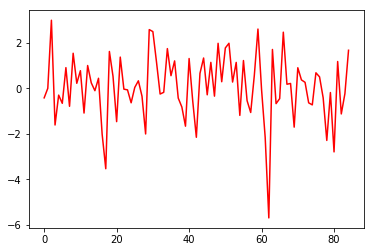

Test MSE: 1.017


In [31]:
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

***Plot the line graph to represent how well the error is covered by the ann***

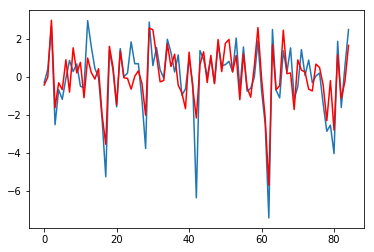

Test MSE: 1.017


In [32]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)


***Calculating the sum of prediction value by arima and amount error by the ann***

In [33]:
pred_final = predictions + predicted_list[7:]
error = mse(test[7:],pred_final)
print('Test MSE: %.3f' % error)

Test MSE: 1.017


***Plot the line graph to represent how well the data is covered by the arima and ann***

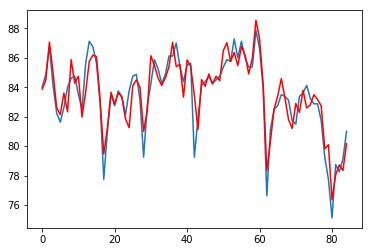

In [34]:
Y = pd.DataFrame(test[7:])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()